In [1]:
#print('Hyggehejsa')#husk at give permission chmod u+x alter_eta.x
import numpy as np
import subprocess 

# Run the compiled program with an input parameter
Yp=[]
Yp_err=[]
D=[]
D_err=[]
He3=[]
He3_err=[]
Li7=[]
Li7_err=[]

xvals=np.logspace(np.log(0.7),np.log(7),base=np.exp(1),num=50)
for x in xvals:
    input_param = str(x/4.171*6.1e-10)
    result = subprocess.run(["/home/hansbdein/Speciale/alterbbn_v2.2/alter_eta.x", input_param], capture_output=True)
    Yp.append(float(result.stdout.decode("utf-8").split('\n')[9].split('\t')[1]))
    Yp_err.append(float(result.stdout.decode("utf-8").split('\n')[10].split('\t')[1]))
    D.append(float(result.stdout.decode("utf-8").split('\n')[9].split('\t')[2]))
    D_err.append(float(result.stdout.decode("utf-8").split('\n')[10].split('\t')[2]))
    He3.append(float(result.stdout.decode("utf-8").split('\n')[9].split('\t')[3]))
    He3_err.append(float(result.stdout.decode("utf-8").split('\n')[10].split('\t')[3]))
    Li7.append(float(result.stdout.decode("utf-8").split('\n')[9].split('\t')[4]))
    Li7_err.append(float(result.stdout.decode("utf-8").split('\n')[10].split('\t')[4]))
'''
#input_param = '3e-10'
#result = subprocess.run(["/home/hansbdein/Speciale/alterbbn_v2.2/alter_eta.x", input_param], capture_output=True)

# Omega_b = 4.171*10^-31 g/cm^3 
# svarer til Eta =6.1e-10
# Print the output of the program
#print(result.stdout.decode("utf-8"))

for info in result.stdout.decode("utf-8").split('\n')[8:11]:
    print(info)
    print('lmao')
'''

'\n#input_param = \'3e-10\'\n#result = subprocess.run(["/home/hansbdein/Speciale/alterbbn_v2.2/alter_eta.x", input_param], capture_output=True)\n\n# Omega_b = 4.171*10^-31 g/cm^3 \n# svarer til Eta =6.1e-10\n# Print the output of the program\n#print(result.stdout.decode("utf-8"))\n\nfor info in result.stdout.decode("utf-8").split(\'\n\')[8:11]:\n    print(info)\n    print(\'lmao\')\n'

[1.00911053e-10 1.06760969e-09]


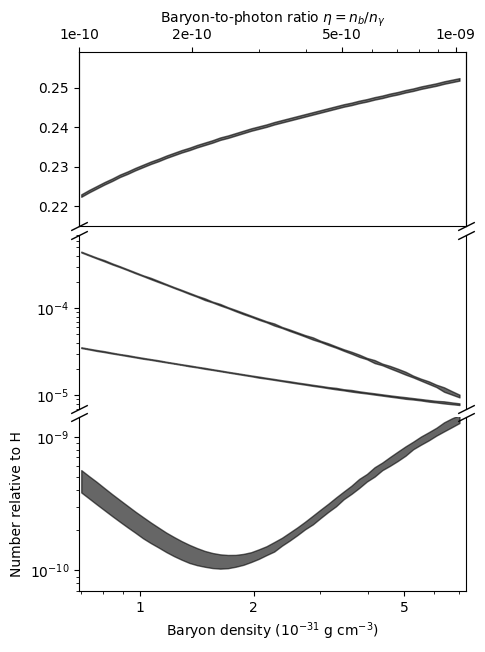

In [59]:

import matplotlib.pyplot as plt
'''
np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8
pts[[8, 23]] -= 1.2
'''
# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(5, 7))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
#fix x axis
plt.xscale('log')
plt.xticks([1,2,5],[1,2,5])

plt.xlim([0.69, 7.3])
plt.xlabel('Baryon density ($10^{-31}$ g cm$^{-3}$)')
plt.ylabel('Number relative to H')

#ax1.twiny()

'''
# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)
ax3.plot(pts)
'''
#ax1.plot(xvals,Yp,'0.6')
#ax2.plot(xvals,D,'0.6')
#ax2.plot(xvals,He3,'0.6')
ax1.fill_between(xvals, np.array(Yp) - np.array(Yp_err), np.array(Yp) + np.array(Yp_err), alpha=0.6, color='k')
ax2.fill_between(xvals, np.array(D) - np.array(D_err), np.array(D) + np.array(D_err), alpha=0.6, color='k')
ax2.fill_between(xvals, np.array(He3) - np.array(He3_err), np.array(He3) + np.array(He3_err), alpha=0.6, color='k')
ax3.fill_between(xvals, np.array(Li7) - np.array(Li7_err), np.array(Li7) + np.array(Li7_err), alpha=0.6, color='k')
'''
x = np.linspace(0, 10, 1000)
y = np.exp(x/5)-2

ax1.plot(x, y)
ax2.plot(x, y)
ax3.plot(x, y)
'''
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.215, .259)  # outliers only
ax2.set_ylim(0.7e-5, 7e-4)
ax2.set_yscale('log')
ax3.set_ylim(0.7e-10, 1.4e-9)
ax3.set_yscale('log')

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)

#fix for second top axis
ax1.spines.top.set_visible(False)
ax1.tick_params(axis='x', colors='w', which='both')

ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax3.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(axis='x', colors='w', which='both')
ax3.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),     I used '$\sim$' to replaced [(-1, -d), (1, d)]
# (1,0), and (1,1) are the four corners of the axes.   /4.171*6.1e-10
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping. 

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)



topax=ax1.twiny()
topax.set_xlim(np.array(ax1.get_xlim())/4.171*6.1e-10)
print(np.array(ax1.get_xlim())/4.171*6.1e-10)
topax.set_xscale('log')
topticks=np.array([1e-10,2e-10,5e-10,1e-09])
topax.set_xticks(topticks)
topax.set_xticklabels(topticks)
topax.set_xlabel('Baryon-to-photon ratio $\eta=n_b/n_\gamma$')
#ax1.set_xscale(2)
plt.show()

In [60]:
print(7/4.171*6.1e-10)
print(0.7/4.171*6.1e-10)

1.0237353152721167e-09
1.0237353152721167e-10
